In [162]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [163]:
df = pd.read_csv('covid_19_clean_complete.csv')

In [164]:
df.head()

Province/State Country/Region       Lat       Long        Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  2020-01-22          0   
1            NaN        Albania  41.15330  20.168300  2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600  2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800  2020-01-22          0   
4            NaN         Angola -11.20270  17.873900  2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa

In [165]:
print(df.isnull().sum())

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64


In [166]:
# Menghapus kolom "Province/State"
df_clean = df.drop(columns=['Province/State'])

# Menampilkan informasi tentang data setelah penghapusan kolom
print(df_clean.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country/Region  49068 non-null  object 
 1   Lat             49068 non-null  float64
 2   Long            49068 non-null  float64
 3   Date            49068 non-null  object 
 4   Confirmed       49068 non-null  int64  
 5   Deaths          49068 non-null  int64  
 6   Recovered       49068 non-null  int64  
 7   Active          49068 non-null  int64  
 8   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(3)
memory usage: 3.4+ MB
None


In [167]:
df_clean.head()

Country/Region       Lat       Long        Date  Confirmed  Deaths  \
0    Afghanistan  33.93911  67.709953  2020-01-22          0       0   
1        Albania  41.15330  20.168300  2020-01-22          0       0   
2        Algeria  28.03390   1.659600  2020-01-22          0       0   
3        Andorra  42.50630   1.521800  2020-01-22          0       0   
4         Angola -11.20270  17.873900  2020-01-22          0       0   

   Recovered  Active             WHO Region  
0          0       0  Eastern Mediterranean  
1          0       0                 Europe  
2          0       0                 Africa  
3          0       0                 Europe  
4          0       0                 Africa

In [168]:
# Memastikan kolom 'Date' bertipe datetime
df_clean['Date'] = pd.to_datetime(df_clean['Date'])


# 1) Data Understanding
## Descriptive Analytics to understand the data

# Deskripsi Kolom Dataset COVID-19:

Berikut adalah deskripsi singkat untuk setiap kolom dalam dataset COVID-19:

1. **Country/Region**: Kolom ini menyimpan nama negara atau wilayah tempat kasus COVID-19 terkonfirmasi dilaporkan.

2. **Lat**: Kolom ini menyimpan koordinat lintang (latitude) dari lokasi yang dilaporkan, yang menunjukkan posisi utara atau selatan pada bola dunia.

3. **Long**: Kolom ini menyimpan koordinat bujur (longitude) dari lokasi yang dilaporkan, yang menunjukkan posisi timur atau barat pada bola dunia.

4. **Date**: Kolom ini menyimpan tanggal laporan kasus COVID-19.

5. **Confirmed**: Kolom ini menyimpan jumlah total kasus COVID-19 yang terkonfirmasi pada tanggal tertentu di lokasi yang dilaporkan.

6. **Deaths**: Kolom ini menyimpan jumlah total kematian akibat COVID-19 pada tanggal tertentu di lokasi yang dilaporkan.

7. **Recovered**: Kolom ini menyimpan jumlah total pasien yang sembuh dari COVID-19 pada tanggal tertentu di lokasi yang dilaporkan.

8. **Active**: Kolom ini menyimpan jumlah total kasus aktif COVID-19 pada tanggal tertentu di lokasi yang dilaporkan. Ini adalah selisih antara jumlah terkonfirmasi dengan jumlah kematian dan jumlah kesembuhan.

9. **WHO Region**: Kolom ini menyimpan wilayah WHO di mana negara atau wilayah tersebut berada, seperti Afrika, Amerika, Eropa, Timur Tengah, Pasifik Barat, dan Asia Tenggara.


In [169]:
# Menampilkan ringkasan statistik untuk kolom numerik
print("Ringkasan Statistik untuk Kolom Numerik:")
print(df_clean.describe())

# Menampilkan informasi umum tentang dataset
print("\nInformasi Umum tentang Dataset:")
print(df_clean.info())

Ringkasan Statistik untuk Kolom Numerik:
                Lat          Long     Confirmed         Deaths     Recovered  \
count  49068.000000  49068.000000  4.906800e+04   49068.000000  4.906800e+04   
mean      21.433730     23.528236  1.688490e+04     884.179160  7.915713e+03   
std       24.950320     70.442740  1.273002e+05    6313.584411  5.480092e+04   
min      -51.796300   -135.000000  0.000000e+00       0.000000  0.000000e+00   
25%        7.873054    -15.310100  4.000000e+00       0.000000  0.000000e+00   
50%       23.634500     21.745300  1.680000e+02       2.000000  2.900000e+01   
75%       41.204380     80.771797  1.518250e+03      30.000000  6.660000e+02   
max       71.706900    178.065000  4.290259e+06  148011.000000  1.846641e+06   

             Active  
count  4.906800e+04  
mean   8.085012e+03  
std    7.625890e+04  
min   -1.400000e+01  
25%    0.000000e+00  
50%    2.600000e+01  
75%    6.060000e+02  
max    2.816444e+06  

Informasi Umum tentang Dataset:
<class 

In [170]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Country/Region  49068 non-null  object        
 1   Lat             49068 non-null  float64       
 2   Long            49068 non-null  float64       
 3   Date            49068 non-null  datetime64[ns]
 4   Confirmed       49068 non-null  int64         
 5   Deaths          49068 non-null  int64         
 6   Recovered       49068 non-null  int64         
 7   Active          49068 non-null  int64         
 8   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 3.4+ MB


### Ringkasan Statistik untuk Kolom Numerik:

#### Latitude (Lat):
- Rata-rata latitude dari lokasi yang dilaporkan adalah sekitar 21.43.
- Standar deviasi latitude adalah sekitar 24.95, menunjukkan variasi yang cukup besar dalam data.
- Nilai minimum latitude adalah -51.80 dan nilai maksimumnya adalah 71.71.
- Kuartil pertama (25%) dari latitude adalah sekitar 7.87, dan kuartil ketiga (75%) adalah sekitar 41.20.

#### Longitude (Long):
- Rata-rata longitude dari lokasi yang dilaporkan adalah sekitar 23.53.
- Standar deviasi longitude adalah sekitar 70.44, menunjukkan variasi yang cukup besar dalam data.
- Nilai minimum longitude adalah -135.00 dan nilai maksimumnya adalah 178.07.
- Kuartil pertama (25%) dari longitude adalah sekitar -15.31, dan kuartil ketiga (75%) adalah sekitar 80.77.

#### Kasus Terkonfirmasi (Confirmed):
- Jumlah kasus COVID-19 terkonfirmasi memiliki variasi yang sangat besar, dengan rata-rata sekitar 16,885 kasus.
- Standar deviasi dari jumlah kasus terkonfirmasi adalah sekitar 127,300, menunjukkan variasi yang signifikan dalam data.
- Jumlah kasus terkonfirmasi berkisar dari 0 hingga lebih dari 4 juta kasus.

#### Kematian (Deaths):
- Rata-rata jumlah kematian akibat COVID-19 adalah sekitar 884, dengan standar deviasi sekitar 6,314.
- Jumlah kematian berkisar dari 0 hingga lebih dari 148,000.

#### Kesembuhan (Recovered):
- Rata-rata jumlah pasien yang sembuh dari COVID-19 adalah sekitar 7,916, dengan standar deviasi sekitar 54,801.
- Jumlah kesembuhan berkisar dari 0 hingga lebih dari 1,846,000.

#### Kasus Aktif (Active):
- Rata-rata jumlah kasus aktif COVID-19 adalah sekitar 8,085, dengan standar deviasi sekitar 76,259.
- Jumlah kasus aktif berkisar dari -14 hingga lebih dari 2,816,000, yang menunjukkan adanya beberapa nilai negatif yang mungkin perlu diperhatikan.


In [171]:
# Memeriksa nama-nama kolom dalam DataFrame
df_clean.head()

Country/Region       Lat       Long       Date  Confirmed  Deaths  \
0    Afghanistan  33.93911  67.709953 2020-01-22          0       0   
1        Albania  41.15330  20.168300 2020-01-22          0       0   
2        Algeria  28.03390   1.659600 2020-01-22          0       0   
3        Andorra  42.50630   1.521800 2020-01-22          0       0   
4         Angola -11.20270  17.873900 2020-01-22          0       0   

   Recovered  Active             WHO Region  
0          0       0  Eastern Mediterranean  
1          0       0                 Europe  
2          0       0                 Africa  
3          0       0                 Europe  
4          0       0                 Africa

In [172]:
# Import library yang dibutuhkan
from sklearn.cluster import KMeans

X = df_clean[['Confirmed', 'Deaths', 'Recovered', 'Active']]

kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(X)


labels = kmeans.labels_


df_clean['Cluster'] = labels

print(df_clean)



c:\Users\cicog\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



              Country/Region        Lat       Long       Date  Confirmed  \
0                Afghanistan  33.939110  67.709953 2020-01-22          0   
1                    Albania  41.153300  20.168300 2020-01-22          0   
2                    Algeria  28.033900   1.659600 2020-01-22          0   
3                    Andorra  42.506300   1.521800 2020-01-22          0   
4                     Angola -11.202700  17.873900 2020-01-22          0   
...                      ...        ...        ...        ...        ...   
49063  Sao Tome and Principe   0.186400   6.613100 2020-07-27        865   
49064                  Yemen  15.552727  48.516388 2020-07-27       1691   
49065                Comoros -11.645500  43.333300 2020-07-27        354   
49066             Tajikistan  38.861000  71.276100 2020-07-27       7235   
49067                Lesotho -29.610000  28.233600 2020-07-27        505   

       Deaths  Recovered  Active             WHO Region  Cluster  
0           0       

In [173]:

df_clean.head()


Country/Region       Lat       Long       Date  Confirmed  Deaths  \
0    Afghanistan  33.93911  67.709953 2020-01-22          0       0   
1        Albania  41.15330  20.168300 2020-01-22          0       0   
2        Algeria  28.03390   1.659600 2020-01-22          0       0   
3        Andorra  42.50630   1.521800 2020-01-22          0       0   
4         Angola -11.20270  17.873900 2020-01-22          0       0   

   Recovered  Active             WHO Region  Cluster  
0          0       0  Eastern Mediterranean        2  
1          0       0                 Europe        2  
2          0       0                 Africa        2  
3          0       0                 Europe        2  
4          0       0                 Africa        2

In [174]:

formated_gdf = df.groupby(['Date', 'Country/Region'])['Confirmed', 'Deaths'].max().reset_index()

formated_gdf['Date'] = pd.to_datetime(formated_gdf['Date']).dt.strftime('%m/%d/%Y')


formated_gdf['size'] = formated_gdf['Confirmed'].pow(0.3)


fig = px.scatter_geo(formated_gdf, 
                     locations="Country/Region", 
                     locationmode='country names', 
                     color="Confirmed", 
                     size='size', 
                     hover_name="Country/Region", 
                     range_color=[0, 1500], 
                     projection="natural earth", 
                     animation_frame="Date", 
                     title='COVID-19: Spread Over Time', 
                     color_continuous_scale="portland"
                    )

# Show the plot
fig.show()


C:\Users\cicog\AppData\Local\Temp\ipykernel_8868\2156750300.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [181]:

temp = df_clean[[col for col in df_clean.columns if col != 'WHO Region']]

latest = temp[temp['Date'] == max(temp['Date'])].reset_index()

latest_grouped = latest.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()


fig = px.choropleth(latest_grouped, 
                    locations="Country/Region", 
                    locationmode='country names', 
                    color="Active", 
                    hover_name="Active", 
                    range_color=[1, 1000], 
                    color_continuous_scale="peach", 
                    title='Active Cases Worldwide')
fig.show()


C:\Users\cicog\AppData\Local\Temp\ipykernel_8868\3275417060.py:8: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



# Analisis Kasus COVID-19

Meskipun China telah melakukan upaya besar dalam mengendalikan penyebaran virus, kita tidak boleh merasa aman begitu saja. China masih tampak memiliki lebih banyak kasus aktif dibandingkan banyak negara lain di dunia. Wilayah ini masih menjadi wilayah yang sangat rentan terhadap virus.

Temuan menarik dari semua plot ini adalah bahwa Afrika Sub-Sahara, bagian dari Eropa Timur, Rusia, dan India tampaknya memiliki kasus yang lebih sedikit dibandingkan dengan sisanya.

Namun, situasi bisa menjadi jauh lebih buruk ketika virus ini mencapai Afrika, jadi lebih baik menjaga jarak sejauh mungkin.



In [175]:
import plotly.express as px

# Group data by country
grouped_china = df_clean[df_clean['Country/Region'] == "China"].reset_index()
grouped_china_date = grouped_china.groupby('Date')['Date', 'Confirmed', 'Deaths'].sum().reset_index()

grouped_italy = df_clean[df_clean['Country/Region'] == "Italy"].reset_index()
grouped_italy_date = grouped_italy.groupby('Date')['Date', 'Confirmed', 'Deaths'].sum().reset_index()

grouped_us = df_clean[df_clean['Country/Region'] == "US"].reset_index()
grouped_us_date = grouped_us.groupby('Date')['Date', 'Confirmed', 'Deaths'].sum().reset_index()

grouped_rest = df_clean[~df_clean['Country/Region'].isin(['China', 'Italy', 'US'])].reset_index()
grouped_rest_date = grouped_rest.groupby('Date')['Date', 'Confirmed', 'Deaths'].sum().reset_index()

plot_titles = ['China', 'Italy', 'USA', 'Rest of the World']

# Plotting
fig1 = px.line(grouped_china_date, x="Date", y="Confirmed", 
               title=f"Confirmed Cases in {plot_titles[0].upper()} Over Time", 
               color_discrete_sequence=['#F61067'], height=500)
fig1.show()

fig2 = px.line(grouped_italy_date, x="Date", y="Confirmed", 
               title=f"Confirmed Cases in {plot_titles[1].upper()} Over Time", 
               color_discrete_sequence=['#91C4F2'], height=500)
fig2.show()

fig3 = px.line(grouped_us_date, x="Date", y="Confirmed", 
               title=f"Confirmed Cases in {plot_titles[2].upper()} Over Time", 
               color_discrete_sequence=['#6F2DBD'], height=500)
fig3.show()

fig4 = px.line(grouped_rest_date, x="Date", y="Confirmed", 
               title=f"Confirmed Cases in {plot_titles[3].upper()} Over Time", 
               color_discrete_sequence=['#FFDF64'], height=500)
fig4.show()

C:\Users\cicog\AppData\Local\Temp\ipykernel_8868\1724220109.py:5: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

C:\Users\cicog\AppData\Local\Temp\ipykernel_8868\1724220109.py:5: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\cicog\AppData\Local\Temp\ipykernel_8868\1724220109.py:8: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

C:\Users\cicog\AppData\Local\Temp\ipykernel_8868\1724220109.py:8: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Use

# Analisis Kasus Penyakit

## China
Dari grafik kasus di China, tampak jelas bahwa tingkat penyakit tidak mengkhawatirkan sejak awal Maret. Ini adalah berita yang sangat baik untuk China.

## Italia
Namun, situasi di Italia tampaknya berbeda. Mereka sangat terpengaruh. Kenaikan tajam di Italia adalah hal yang mengkhawatirkan dan beberapa hari mendatang sangat krusial.

## Amerika Serikat
Lonjakan yang jelas pada grafik AS mungkin merupakan hasil dari lebih banyak kasus yang diuji untuk pertama kalinya. Situasi di AS juga sangat mengkhawatirkan. Peningkatan dalam 2-3 hari terakhir ini signifikan.

## Sisa Dunia
Sisa Dunia yang digabungkan juga mengalami peningkatan yang stabil dalam kasus terkonfirmasi.


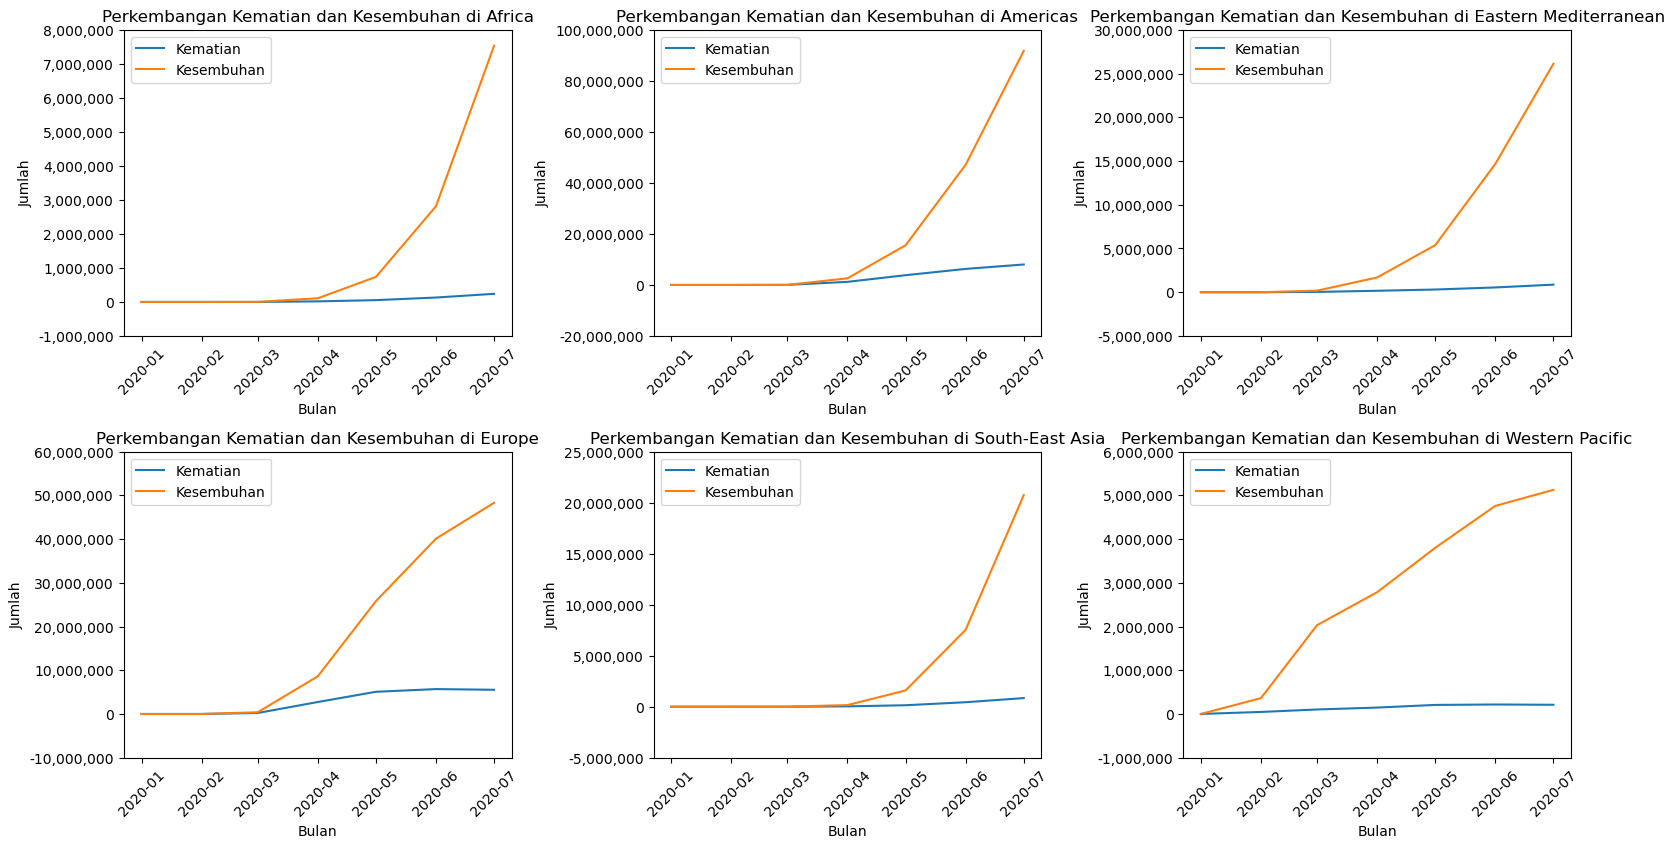

In [176]:
data_per_month = df_clean.groupby([df_clean['Date'].dt.to_period('M'), 'WHO Region']).agg({'Deaths': 'sum', 'Recovered': 'sum'}).reset_index()

data_per_month['Date'] = data_per_month['Date'].dt.to_timestamp()

plt.figure(figsize=(16, 12))

for i, region in enumerate(data_per_month['WHO Region'].unique(), 1):
    plt.subplot(3, 3, i)
    data_region = data_per_month[data_per_month['WHO Region'] == region]
    sns.lineplot(x='Date', y='Deaths', data=data_region, label='Kematian')
    sns.lineplot(x='Date', y='Recovered', data=data_region, label='Kesembuhan')
    plt.title(f'Perkembangan Kematian dan Kesembuhan di {region}')
    plt.xlabel('Bulan')
    plt.ylabel('Jumlah')
    plt.xticks(rotation=45)
    plt.yticks(ticks=plt.gca().get_yticks(), labels=[f'{int(tick):,}' for tick in plt.gca().get_yticks()])  # Mengubah label sumbu y menjadi format ribuan
    plt.legend()

plt.tight_layout()
plt.show()



# Analisis Kasus COVID-19 Berdasarkan Wilayah

Grafik ini menunjukkan perkembangan kasus kematian dan pemulihan di berbagai wilayah di seluruh dunia, memberikan wawasan tentang tren dan perbandingan dua aspek ini seiring waktu.

## Wawasan Kunci:

1. **Perbandingan antar Wilayah:**
   - Grafik ini memungkinkan kita untuk membandingkan bagaimana kasus kematian dan pemulihan berkembang di berbagai wilayah seiring waktu.
   - Beberapa wilayah mungkin menunjukkan peningkatan atau penurunan yang lebih cepat dalam kasus kematian atau pemulihan dibandingkan dengan wilayah lain.

2. **Tren Kasus Kematian dan Pemulihan:**
   - Dengan melihat grafik ini, kita dapat melihat bagaimana kasus kematian dan pemulihan berkembang seiring waktu di setiap wilayah.
   - Misalnya, jika garis kasus pemulihan meningkat sementara garis kasus kematian menurun, ini bisa menunjukkan bahwa tindakan pengobatan dan pencegahan di wilayah tersebut efektif.

3. **Periode Waktu:**
   - Grafik ini mencakup periode waktu tertentu, yang memungkinkan kita untuk melihat bagaimana kasus kematian dan pemulihan berkembang selama periode tersebut.


Grafik garis ini menunjukkan tren kasus kematian dan pemulihan COVID-19 seiring waktu di berbagai wilayah. Setiap garis mewakili wilayah tertentu, dan posisi garis pada setiap titik waktu mencerminkan jumlah kasus kematian atau pemulihan pada titik waktu tersebut.



In [177]:
import plotly.express as px

temp = df_clean.groupby('Date')['Recovered', 'Deaths', 'Active'].sum().reset_index()
temp = temp.melt(id_vars="Date", value_vars=['Recovered', 'Deaths', 'Active'],
                 var_name='Case', value_name='Count')

fig_line = px.line(temp, x="Date", y="Count", color='Case',
                   title='Cases over Time: Line Plot', color_discrete_sequence=['cyan', 'red', 'orange'])
fig_line.show()


C:\Users\cicog\AppData\Local\Temp\ipykernel_8868\2633081581.py:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



# Analisis Kasus COVID-19 Seiring Waktu

Grafik garis ini menggambarkan tren kasus yang sembuh, kematian, dan kasus aktif dari Februari hingga Juli 2020. Ini memberikan wawasan tentang perkembangan pandemi selama periode ini.

## Wawasan Kunci:

1. **Peningkatan Kasus yang Sembuh:** Ada peningkatan signifikan dalam jumlah kasus yang sembuh seiring waktu. Ini mungkin menunjukkan efektivitas tindakan pengobatan dan pencegahan.

2. **Stabilitas Kasus Kematian dan Aktif:** Jumlah kematian dan kasus aktif menunjukkan kenaikan yang lebih stabil dan tidak tajam seperti kasus sembuh. Ini mungkin menunjukkan bahwa penyebaran virus masih berlangsung.

3. **Periode Waktu:** Grafik ini mencakup periode dari Februari hingga Juli 2020, yang merupakan periode penting dalam perkembangan pandemi COVID-19.



Grafik garis ini menunjukkan tren kasus COVID-19 seiring waktu. Garis biru mewakili kasus yang sembuh, garis merah mewakili kematian, dan garis kuning mewakili kasus aktif. Dari grafik ini, kita dapat melihat bahwa jumlah kasus yang sembuh telah meningkat secara signifikan seiring waktu.



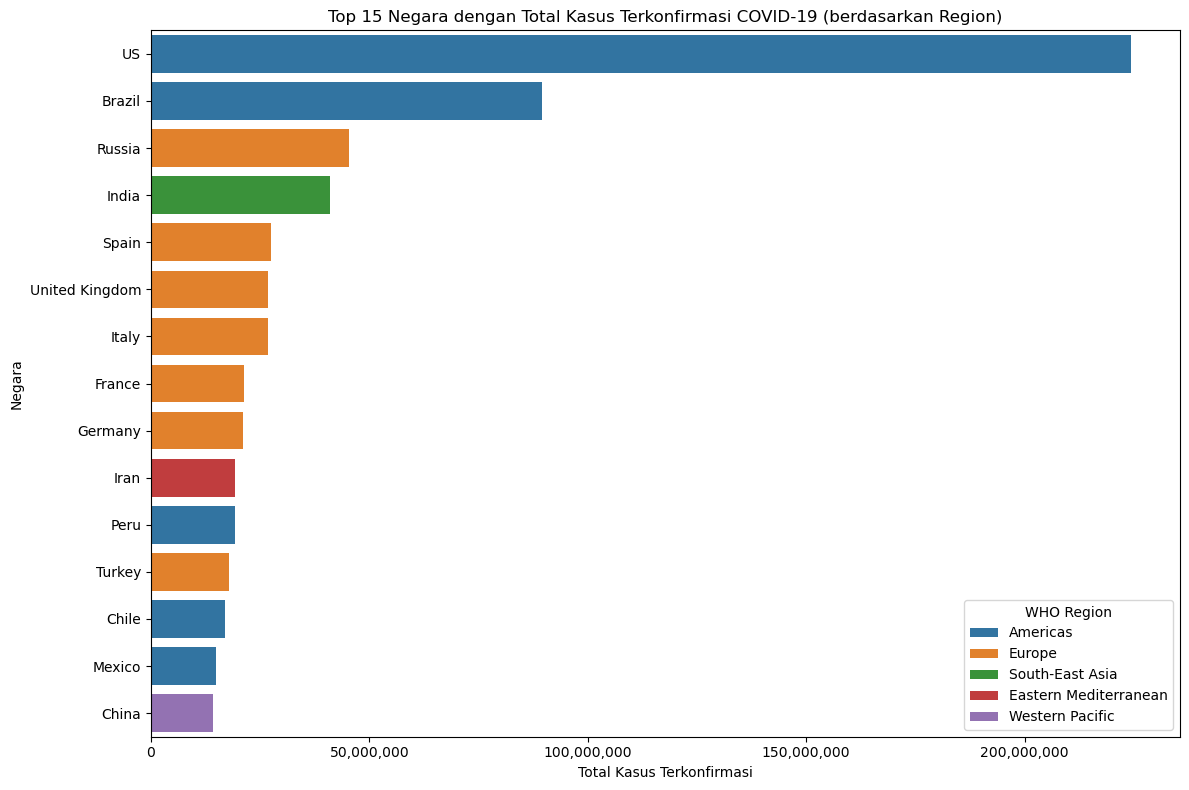

In [178]:
from matplotlib.ticker import FuncFormatter


data_per_country = df_clean.groupby(['Country/Region', 'WHO Region']).agg({'Confirmed': 'sum'}).reset_index()

top_15_countries = data_per_country.nlargest(15, 'Confirmed')

plt.figure(figsize=(12, 8))
sns.barplot(x='Confirmed', y='Country/Region', hue='WHO Region', data=top_15_countries, dodge=False)

def format_func(x, pos):
    return "{:,.0f}".format(x)

plt.gca().xaxis.set_major_formatter(FuncFormatter(format_func))

plt.title('Top 15 Negara dengan Total Kasus Terkonfirmasi COVID-19 (berdasarkan Region)')
plt.xlabel('Total Kasus Terkonfirmasi')
plt.ylabel('Negara')

plt.legend(title='WHO Region')
plt.tight_layout()
plt.show()


# Analisis Kasus COVID-19 Berdasarkan Negara dan Wilayah

Grafik batang ini menggambarkan data dari 15 negara teratas dengan kasus COVID-19 yang dikonfirmasi, dikelompokkan berdasarkan wilayah WHO. Ini memberikan wawasan tentang penyebaran dan dampak pandemi secara global.

## Wawasan Kunci:

1. **Dampak Beragam di Berbagai Wilayah:**
   - Amerika dan Eropa sangat terpengaruh, dengan beberapa negara dari wilayah ini muncul di 15 besar.
   - Negara seperti China di mana virus pertama kali dilaporkan telah berhasil mengendalikan penyebarannya dengan efektif.

2. **Observasi Spesifik Negara:**
   - AS memiliki jumlah kasus tertinggi, diikuti oleh Brasil.
   - Meskipun berada di wilayah WHO yang berbeda, negara tetangga dapat memiliki jumlah kasus yang serupa (misalnya, Prancis dan Jerman).

3. **Tantangan Interpretasi Data:**
   - Data harus dianalisis dengan mempertimbangkan berbagai faktor seperti ukuran populasi, tingkat pengujian, dll., untuk mendapatkan kesimpulan yang bermakna.



Grafik batang ini menunjukkan 15 negara dengan jumlah kasus COVID-19 terbanyak. Setiap batang mewakili satu negara, dan panjang batang mencerminkan jumlah kasus yang dikonfirmasi. Negara-negara ini dikelompokkan berdasarkan wilayah WHO mereka, yang ditunjukkan oleh warna batang.

Dari grafik ini, kita dapat melihat bahwa AS memiliki jumlah kasus yang jauh lebih banyak dibandingkan negara lain. Brasil, India, dan Rusia juga memiliki jumlah kasus yang signifikan. Jumlah kasus di negara lain relatif lebih rendah.




In [180]:
df_clean.head()

Country/Region       Lat       Long       Date  Confirmed  Deaths  \
0    Afghanistan  33.93911  67.709953 2020-01-22          0       0   
1        Albania  41.15330  20.168300 2020-01-22          0       0   
2        Algeria  28.03390   1.659600 2020-01-22          0       0   
3        Andorra  42.50630   1.521800 2020-01-22          0       0   
4         Angola -11.20270  17.873900 2020-01-22          0       0   

   Recovered  Active             WHO Region  Cluster  
0          0       0  Eastern Mediterranean        2  
1          0       0                 Europe        2  
2          0       0                 Africa        2  
3          0       0                 Europe        2  
4          0       0                 Africa        2

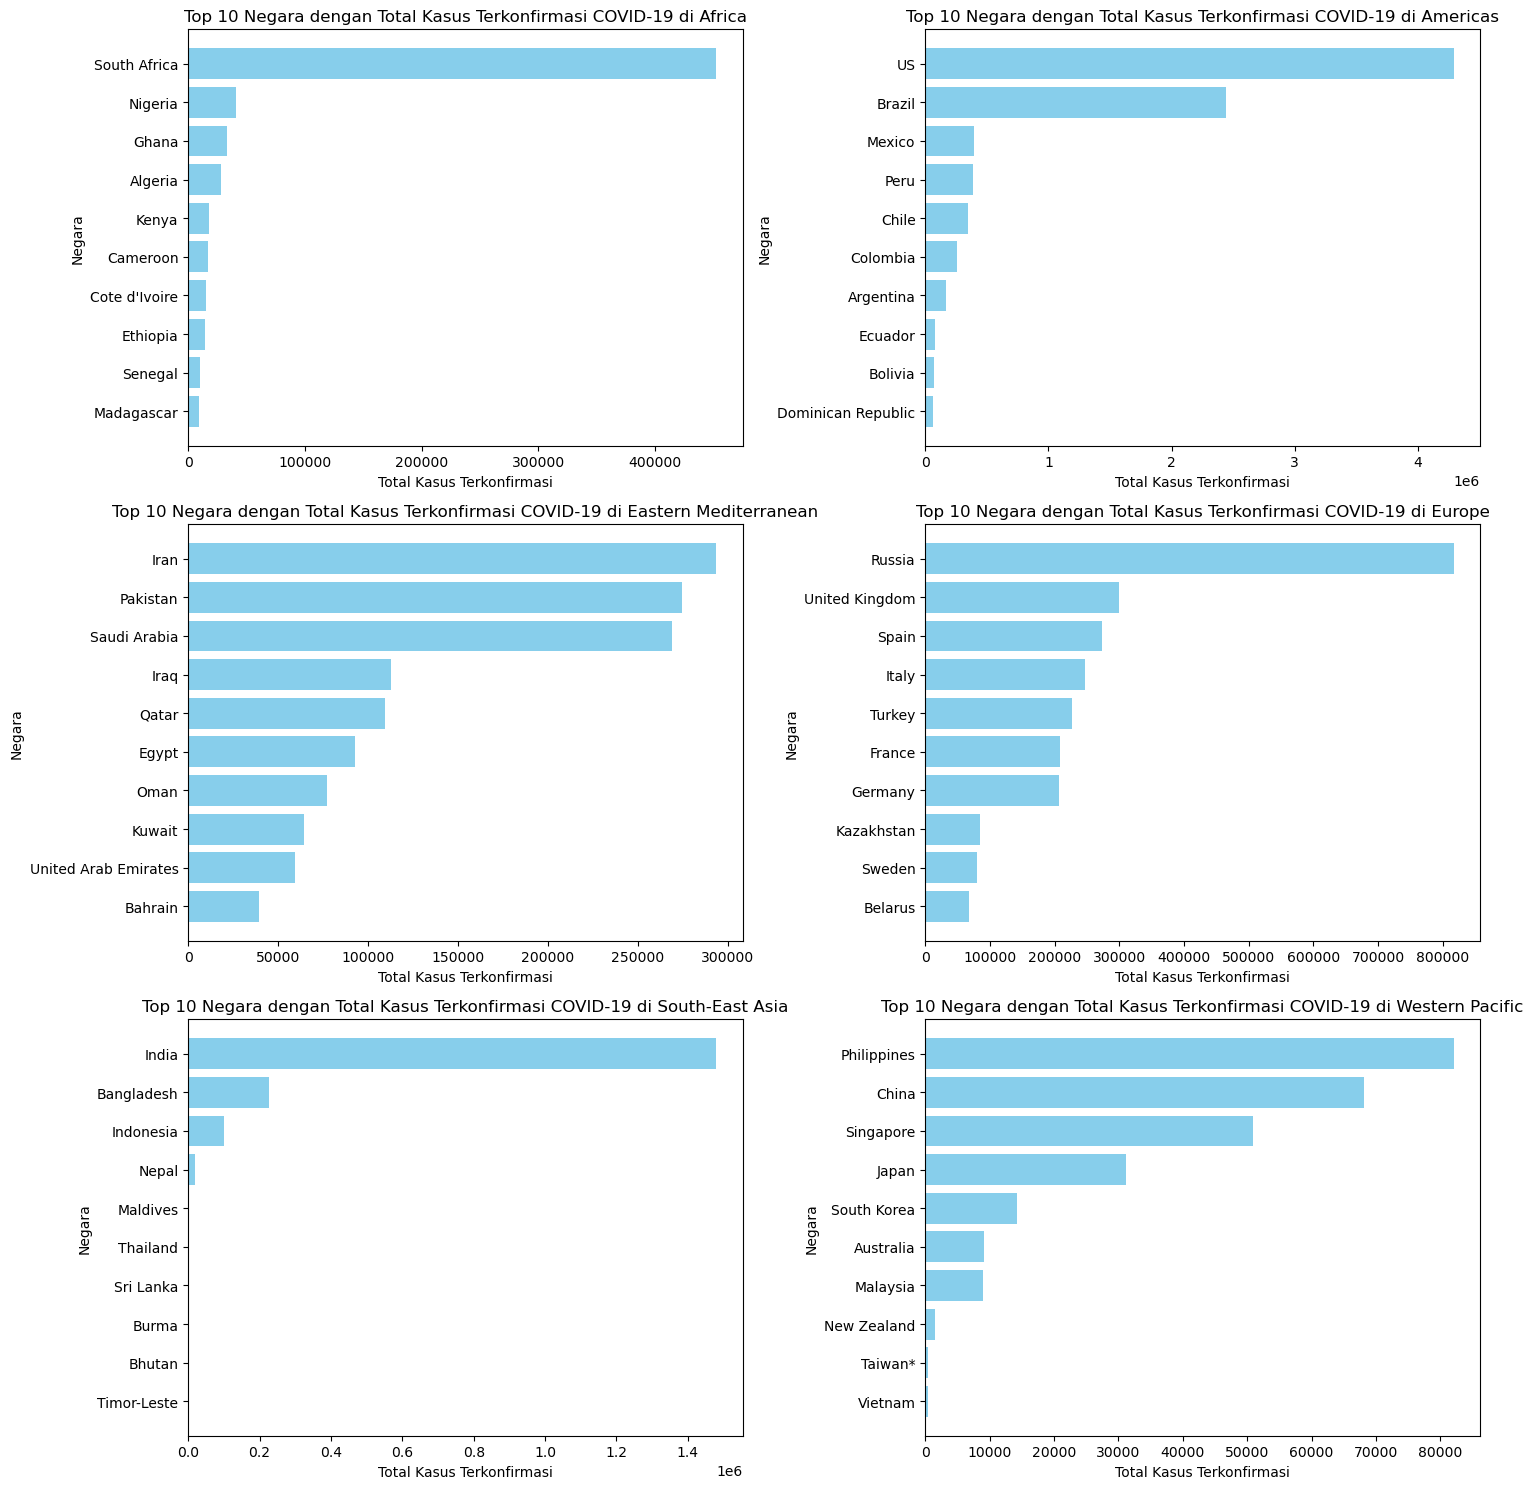

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

for ax, (region, data) in zip(axes.flatten(), df_clean.groupby('WHO Region')):
    top_countries = data.groupby('Country/Region')['Confirmed'].max().nlargest(10)
    top_countries = top_countries.iloc[::-1]
    
    ax.barh(top_countries.index, top_countries.values, color='skyblue')
    ax.set_xlabel('Total Kasus Terkonfirmasi')
    ax.set_ylabel('Negara')
    ax.set_title(f'Top 10 Negara dengan Total Kasus Terkonfirmasi COVID-19 di {region}')

plt.tight_layout()
plt.show()


# Analisis Kasus COVID-19 Berdasarkan Wilayah

Grafik ini menunjukkan perkembangan kasus kematian dan pemulihan di berbagai wilayah di seluruh dunia, memberikan wawasan tentang tren dan perbandingan dua aspek ini seiring waktu.

## Wawasan Kunci:

1. **Perbandingan antar Wilayah:**
   - Grafik ini memungkinkan kita untuk membandingkan bagaimana kasus kematian dan pemulihan berkembang di berbagai wilayah seiring waktu.
   - Beberapa wilayah mungkin menunjukkan peningkatan atau penurunan yang lebih cepat dalam kasus kematian atau pemulihan dibandingkan dengan wilayah lain.

2. **Tren Kasus Kematian dan Pemulihan:**
   - Dengan melihat grafik ini, kita dapat melihat bagaimana kasus kematian dan pemulihan berkembang seiring waktu di setiap wilayah.
   - Misalnya, jika garis kasus pemulihan meningkat sementara garis kasus kematian menurun, ini bisa menunjukkan bahwa tindakan pengobatan dan pencegahan di wilayah tersebut efektif.

3. **Periode Waktu:**
   - Grafik ini mencakup periode waktu tertentu, yang memungkinkan kita untuk melihat bagaimana kasus kematian dan pemulihan berkembang selama periode tersebut.

Sekali lagi, Eropa Barat mendominasi jumlah kasus terkonfirmasi dengan Italia lebih dari dua kali lipat dari Spanyol yang paling terkena dampak kedua, dan Jerman tidak jauh ketinggalan di belakang.

Grafik garis ini menunjukkan tren kasus kematian dan pemulihan COVID-19 seiring waktu di berbagai wilayah. Setiap garis mewakili wilayah tertentu, dan posisi garis pada setiap titik waktu mencerminkan jumlah kasus kematian atau pemulihan pada titik waktu tersebut.


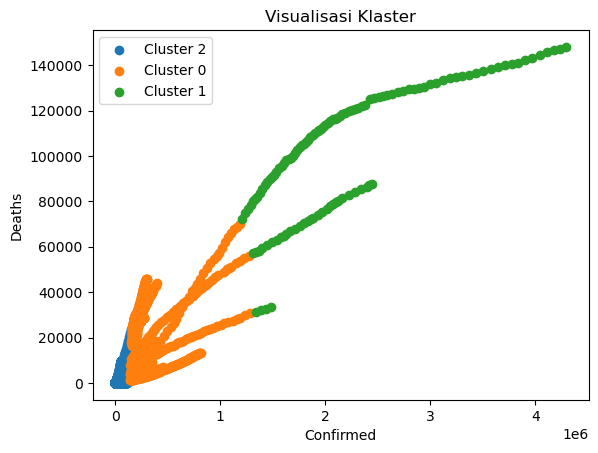

In [ ]:

# Buat plot untuk setiap klaster
for cluster in df_clean['Cluster'].unique():
    # Ambil data untuk klaster ini
    cluster_data = df_clean[df_clean['Cluster'] == cluster]
    
    # Plot data klaster ini
    plt.scatter(cluster_data['Confirmed'], cluster_data['Deaths'], label=f'Cluster {cluster}')

# Tambahkan legenda dan judul
plt.legend()
plt.title('Visualisasi Klaster')
plt.xlabel('Confirmed')
plt.ylabel('Deaths')

# Tampilkan plot
plt.show()


## Metode Klasterisasi

Kita akan menggunakan metode K-Means untuk melakukan klasterisasi. K-Means adalah algoritma klasterisasi yang populer yang mengelompokkan data ke dalam K klaster.

## Visualisasi Klaster

Setelah melakukan klasterisasi, kita dapat memvisualisasikan klaster dengan membuat scatter plot. Dalam plot ini, setiap titik mewakili satu baris dalam data kita dan diwarnai berdasarkan klaster. Kita memplot 'Confirmed' di sumbu x dan 'Deaths' di sumbu y.

!Visualisasi Klaster

Dalam visualisasi ini, kita dapat melihat tiga klaster yang berbeda:

- Klaster 0 (biru): Menunjukkan negara-negara dengan jumlah kasus dan kematian yang rendah.
- Klaster 1 (oranye): Menunjukkan negara-negara dengan jumlah kasus dan kematian yang sedang.
- Klaster 2 (hijau): Menunjukkan negara-negara dengan jumlah kasus yang tinggi tetapi tingkat kematian yang bervariasi.

## Kesimpulan

Dengan melakukan klasterisasi, kita dapat mengidentifikasi pola dalam data dan mendapatkan wawasan yang lebih baik tentang hubungan antara jumlah kasus yang dikonfirmasi dan jumlah kematian di berbagai negara.


              precision    recall  f1-score   support

           0       0.43      0.97      0.59       216
           1       0.82      1.00      0.90        27
           2       1.00      0.97      0.99      9571

    accuracy                           0.97      9814
   macro avg       0.75      0.98      0.83      9814
weighted avg       0.99      0.97      0.98      9814



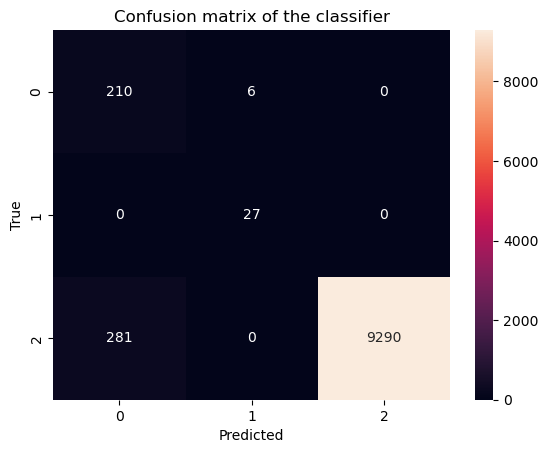

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

X = df_clean[['Confirmed', 'Deaths', 'Recovered', 'Active']]
y = df_clean['Cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gnb = GaussianNB()

gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# Wawasan dari Visualisasi

Heat Map di atas menggambarkan Confusion matrix dari sebuah klasifikasi. Setiap sel dalam matriks mewakili jumlah observasi untuk setiap kombinasi label sebenarnya dan label yang diprediksi.

#### Komponen Utama:

1. **Sumbu:**
   - Sumbu-x mewakili label yang diprediksi oleh klasifikasi.
   - Sumbu-y mewakili label sebenarnya dalam dataset.

2. **Sel:**
   - Jumlah dan intensitas warna dalam setiap sel mewakili jumlah observasi. Sel yang lebih gelap menunjukkan angka yang lebih tinggi.

3. **Sel Diagonal:**
   - Sel diagonal dari kiri atas ke kanan bawah mewakili prediksi yang benar oleh klasifikasi, di mana label yang diprediksi cocok dengan label sebenarnya.

#### Wawasan yang Diperoleh:

1. **Prediksi yang Benar:**
   - Angka pada diagonal mewakili prediksi yang benar. Ini adalah kasus di mana label yang diprediksi cocok dengan label sebenarnya.

2. **Klasifikasi Salah:**
   - Angka di luar diagonal mewakili klasifikasi yang salah. Ini adalah kasus di mana label yang diprediksi tidak cocok dengan label sebenarnya.

3. **Metrik Kinerja:**
   - Berbagai metrik kinerja dapat diturunkan dari Confusion matrix, seperti akurasi, presisi, recall, dan skor F1.

Kesimpulannya, Confusion matrix memberikan ringkasan komprehensif tentang kinerja klasifikasi, menunjukkan tidak hanya jumlah prediksi yang benar tetapi juga jenis kesalahan yang dibuat.


Root Mean Squared Error: 2.1869248473882592e-10


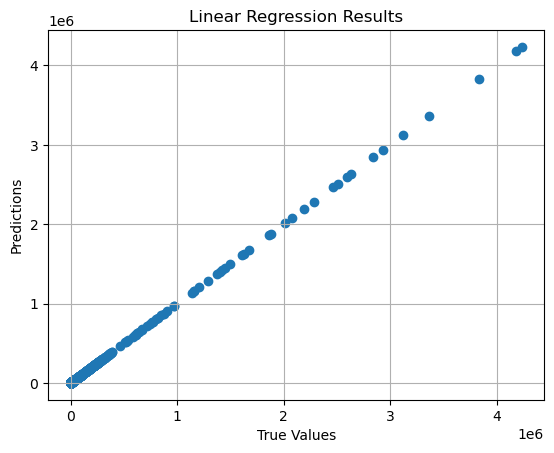

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


X = df_clean[['Deaths', 'Recovered', 'Active']]
y = df_clean['Confirmed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = LinearRegression()

reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse}')

plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Linear Regression Results')
plt.grid(True)
plt.show()


# Analisis Hasil Regresi Linear

Regresi Linear adalah metode statistik yang digunakan untuk memprediksi variabel dependen (target) berdasarkan satu atau lebih variabel independen (fitur). Dalam proyek ini, kita menggunakan Regresi Linear untuk memprediksi jumlah kasus yang dikonfirmasi berdasarkan jumlah kematian, kasus yang sembuh, dan kasus aktif.

## Visualisasi Hasil Regresi

Setelah melakukan regresi, kita dapat memvisualisasikan hasilnya dengan membuat plot sebar. Dalam plot ini, setiap titik mewakili suatu observasi, dengan posisinya ditentukan oleh nilai sebenarnya dan nilai yang diprediksi.

!Hasil Regresi

Dalam visualisasi ini, kita dapat melihat hubungan antara nilai sebenarnya dan nilai yang diprediksi.

## Insight dari Visualisasi

Dari visualisasi hasil regresi, kita dapat memahami bagaimana model membuat prediksi dan seberapa baik prediksi tersebut. Berikut adalah beberapa insight yang dapat kita ambil:

**Akurasi Prediksi**:  titik-titik berada dekat dengan garis diagonal (y = x), ini menunjukkan bahwa nilai sebenarnya dan nilai yang diprediksi sangat dekat, yang berarti model melakukan prediksi dengan baik.

